<h1>palAI & mAIs: Comparative Analysis of Machine
Learning Algorithms for Forecasting Palay and
Corn Production in Region VI (Western Visayas)</h1>

<h3>CMSC 197 Mini Project</h3>
<h4>AI Powered-Team (Manejo, Pajarilla, Vito)</h4>

<h3>Table of Contents</h3>

<ul>
    <li>Data Exploration</li>
    <li>Preprocessing</li>
    <li>Implementation of Machine Learning Algorithms
        <ul>
		<li>Linear Regression</li>
            <li>Random Forest Regression</li>
            <li>Support Vector Regression</li>
            <li> K-Nearest Neighbor (KNN)</li>
            <li>XGBoost</li>
            <li>Artificial Neural Network (ANN)</li>
        </ul>
    </li>
</ul>

<hr>
<h2> Preprocessing</h2>
<hr>

<h4> Importing Libraries </h4>

In [1]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### machine learning algorithms ####
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

# for ANN
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

# for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#### metrics of evaluation ####
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### time series ###
from statsmodels.tsa.seasonal import seasonal_decompose

<h4> Load production volume and area harvested dataset </h4>

In [2]:
production_data = pd.read_csv("https://raw.githubusercontent.com/kazeulo/Project_197/main/dataset/Production_volume.csv")
area_data = pd.read_csv("https://raw.githubusercontent.com/kazeulo/Project_197/main/dataset/Area_harvested.csv")

In [3]:
production_data.head(5)

,Croptype,Province,Quarter 1 1987,Quarter 2 1987,Quarter 3 1987,Quarter 4 1987,Quarter 1 1988,Quarter 2 1988,Quarter 3 1988,Quarter 4 1988,...,Quarter 1 2022,Quarter 2 2022,Quarter 3 2022,Quarter 4 2022,Quarter 1 2023,Quarter 2 2023,Quarter 3 2023,Quarter 4 2023,Quarter 1 2024,Quarter 2 2024
0,Irrigated Palay,Aklan,19309,8971,7603,15727,23007,4255,16790,11766,...,21812.54,7994.02,12843.31,20642.70,17725.19,4504.00,8023.29,20508.02,16674.00,2113.00
1,NaN,Antique,28275,7440,8542,22786,24485,4366,13921,13356,...,48447.00,19146.00,68364.00,46723.97,49682.35,16465.82,47858.70,46714.90,44793.44,12032.20
2,NaN,Capiz,18540,805,406,21903,17872,0,18969,7314,...,32306.30,12063.00,34517.30,25112.06,34479.18,14151.29,26893.60,16226.75,34625.30,12522.75
3,NaN,Guimaras,0,0,0,0,0,0,0,0,...,4328.00,911.00,6036.00,5334.00,5139.00,1020.00,4047.00,6451.00,3837.00,344.00
4,NaN,Iloilo,58187,14743,6823,81600,81691,1256,57985,65076,...,148946.00,14692.00,144971.00,106234.00,155663.00,9195.87,130644.00,160041.35,149292.00,6048.66


In [4]:
area_data.head(5)

,Croptype,Province,Quarter 1 1987,Quarter 2 1987,Quarter 3 1987,Quarter 4 1987,Quarter 1 1988,Quarter 2 1988,Quarter 3 1988,Quarter 4 1988,...,Quarter 1 2022,Quarter 2 2022,Quarter 3 2022,Quarter 4 2022,Quarter 1 2023,Quarter 2 2023,Quarter 3 2023,Quarter 4 2023,Quarter 1 2024,Quarter 2 2024
0,Irrigated Palay,Aklan,6130,3440,2290,6890,7510,1610,6770,4440,...,6668.0,2461.18,4662,5832.77,6696.0,2171,3067,5940,6094,1138
1,NaN,Antique,9030,2430,2590,6350,9430,1620,4310,4770,...,12115.0,5903.00,15630,11325.00,12202.0,4452,10647,11220,12384,3506
2,NaN,Capiz,6300,520,100,5860,5830,0,4790,1940,...,9210.0,4508.00,8470,6704.00,9876.0,4648,6870,5000,9880,4143
3,NaN,Guimaras,0,0,0,0,0,0,0,0,...,1380.0,279.88,1534,1439.00,1330.0,350,1121,1821,1258,190
4,NaN,Iloilo,21270,6030,1850,23310,26270,440,16520,19140,...,41245.0,4235.00,41123,29142.00,42500.0,2658,38145,44625,43392,2124


<h4>Transforming and merging data</h4>

In [5]:
production_data = pd.melt(production_data,
                        id_vars=['Croptype', 'Province'],
                        var_name='Quarter and Year',
                        value_name='Production')

area_data = pd.melt(area_data,
                        id_vars=['Croptype', 'Province'],
                        var_name='Quarter and Year',
                        value_name='Area')

# fill values for croptype
production_data['Croptype'] = production_data['Croptype'].ffill()
area_data['Croptype'] = area_data['Croptype'].ffill()

dataset = pd.merge(production_data, area_data, on=['Croptype', 'Province', 'Quarter and Year'], how='left')

In [6]:
dataset.head(5)

,Croptype,Province,Quarter and Year,Production,Area
0,Irrigated Palay,Aklan,Quarter 1 1987,19309.0,6130.0
1,Irrigated Palay,Antique,Quarter 1 1987,28275.0,9030.0
2,Irrigated Palay,Capiz,Quarter 1 1987,18540.0,6300.0
3,Irrigated Palay,Guimaras,Quarter 1 1987,0.0,0.0
4,Irrigated Palay,Iloilo,Quarter 1 1987,58187.0,21270.0


In [7]:
# split year and quarter into separte columns
dataset['Year'] = dataset['Quarter and Year'].apply(lambda x: int(x.split(' ')[-1]))
dataset['Quarter'] = dataset['Quarter and Year'].apply(lambda x: int(x.split(' ')[1][-1]))

# drop 'Quarter and Year' column
dataset.drop(columns=['Quarter and Year'], inplace=True)

# reorder columns
dataset = dataset[['Croptype', 'Province', 'Quarter', 'Year', 'Area', 'Production']]

In [8]:
dataset.head(5)

,Croptype,Province,Quarter,Year,Area,Production
0,Irrigated Palay,Aklan,1,1987,6130.0,19309.0
1,Irrigated Palay,Antique,1,1987,9030.0,28275.0
2,Irrigated Palay,Capiz,1,1987,6300.0,18540.0
3,Irrigated Palay,Guimaras,1,1987,0.0,0.0
4,Irrigated Palay,Iloilo,1,1987,21270.0,58187.0


In [9]:
rows, columns = dataset.shape

# print the number of rows
print("Number of rows:", rows)

Number of rows: 4500


<h4>Create Date column</h4>

In [10]:
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}

# create the 'Date' column
dataset['Date'] = pd.to_datetime(dataset['Year'].astype(str) +
                                  dataset['Quarter'].map(quarter_to_month).astype(str) + '01',
                                  format='%Y%m%d')

# reorder columns so 'Date' is the leftmost column
dataset = dataset[['Date'] + [col for col in dataset.columns if col != 'Date']]

In [11]:
dataset.head(5)

,Date,Croptype,Province,Quarter,Year,Area,Production
0,1987-10-01,Irrigated Palay,Aklan,1,1987,6130.0,19309.0
1,1987-10-01,Irrigated Palay,Antique,1,1987,9030.0,28275.0
2,1987-10-01,Irrigated Palay,Capiz,1,1987,6300.0,18540.0
3,1987-10-01,Irrigated Palay,Guimaras,1,1987,0.0,0.0
4,1987-10-01,Irrigated Palay,Iloilo,1,1987,21270.0,58187.0


Since Guimaras was included in Iloilo prior to 1994, we'll drop the data for those years to ensure accuracy.

In [12]:
dataset = dataset[~((dataset['Province'].isin(['Guimaras', 'Iloilo'])) & (dataset['Year'] <= 1994))]

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Quarter'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Area'}>],
       [<Axes: title={'center': 'Production'}>, <Axes: >]], dtype=object)

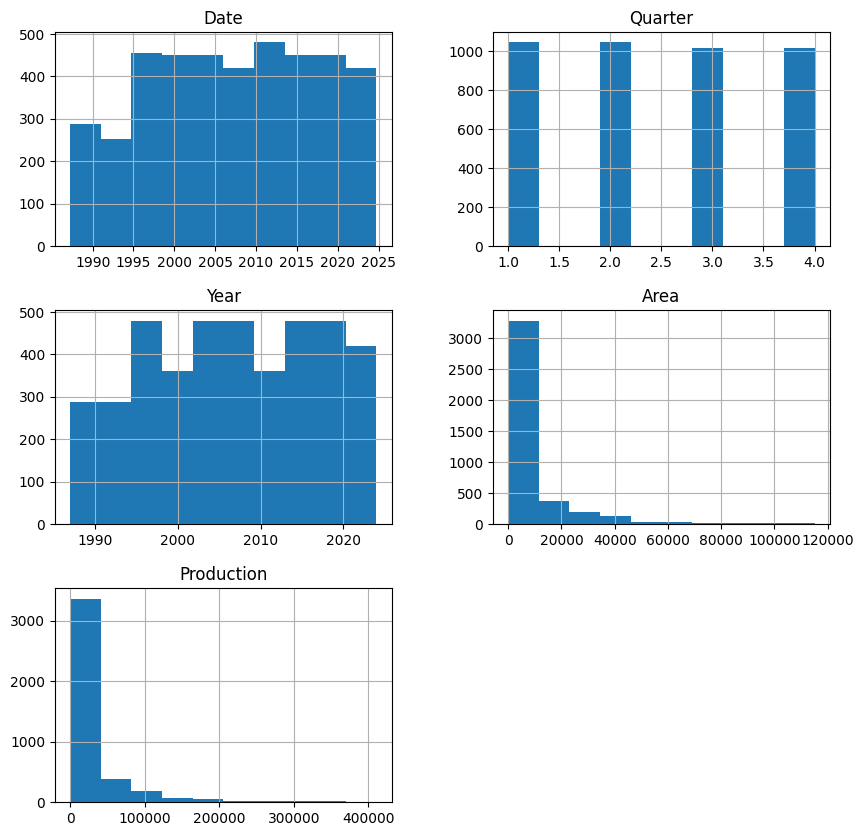

In [13]:
dataset.hist(figsize = (10, 10))

In [14]:
# descriptive statistics
desc_stats = dataset.describe()

print("Descriptive Statistics:")
desc_stats

Descriptive Statistics:


,Date,Quarter,Year,Area,Production
count,4116,4116.000000,4116.000000,4116.000000,4116.000000
mean,2007-03-11 01:11:22.215743488,2.485423,2006.629738,8365.982323,25329.648873
min,1987-04-01 00:00:00,1.000000,1987.000000,0.000000,0.000000
25%,1998-10-01 00:00:00,1.000000,1998.000000,179.750000,240.000000
50%,2007-07-01 00:00:00,2.000000,2007.000000,2137.500000,4992.500000
75%,2015-10-01 00:00:00,3.000000,2015.000000,8701.750000,26568.500000
max,2024-10-01 00:00:00,4.000000,2024.000000,115071.000000,411113.000000
std,NaN,1.118075,10.271357,15466.303607,49564.914948


In [15]:
# frequency distribution of categorical variables
print(dataset['Croptype'].value_counts())
print(dataset['Province'].value_counts())

Croptype
Irrigated Palay    686
Rainfed Palay      686
Palay              686
White Corn         686
Yellow Corn        686
Corn               686
Name: count, dtype: int64
Province
Aklan       900
Antique     900
Capiz       900
Guimaras    708
Iloilo      708
Name: count, dtype: int64


In [16]:
# check for zero values in the entire DataFrame
print((dataset == 0).sum())

Date            0
Croptype        0
Province        0
Quarter         0
Year            0
Area          153
Production    153
dtype: int64


Handling zero values. Using median since it is less sensitive to outliers.

In [17]:
# replace 0 with NaN
dataset.replace(0, np.nan, inplace=True)

In [18]:
# drop rows that contains Nan
dataset = dataset.dropna()

In [19]:
rows, columns = dataset.shape

# print the number of rows
print("Number of rows:", rows)

Number of rows: 3963


<b>Remove outliers.</b>

In [20]:
Q1 = dataset['Production'].quantile(0.25)
Q3 = dataset['Production'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
dataset = dataset[(dataset['Production'] >= (Q1 - 1.5 * IQR)) & (dataset['Production'] <= (Q3 + 1.5 * IQR))]

In [22]:
rows, columns = dataset.shape

# print the number of rows
print("Number of rows:", rows)

Number of rows: 3515


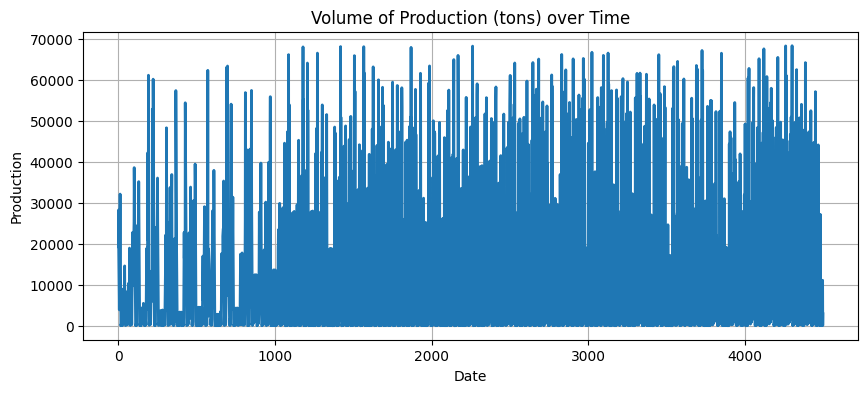

In [23]:
# visualizing the trend of 'Production' over time
plt.figure(figsize=(10, 4))
dataset['Production'].plot(title="Volume of Production (tons) over Time", linewidth=2)
plt.xlabel('Date')
plt.ylabel('Production')
plt.grid(True)
plt.show()

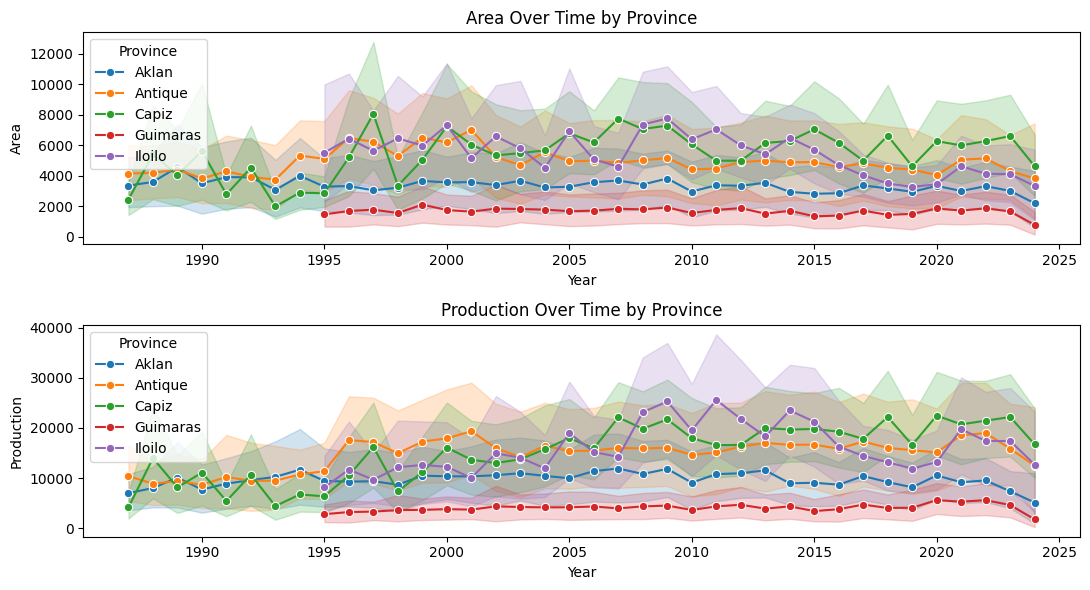

In [24]:
# plot Area and Production over time (Year)
plt.figure(figsize=(11, 6))

# plot Area over time
plt.subplot(2, 1, 1)
sns.lineplot(data=dataset, x='Year', y='Area', hue='Province', marker='o')
plt.title('Area Over Time by Province')
plt.xlabel('Year')
plt.ylabel('Area')

# plot Production over time
plt.subplot(2, 1, 2)
sns.lineplot(data=dataset, x='Year', y='Production', hue='Province', marker='o')
plt.title('Production Over Time by Province')
plt.xlabel('Year')
plt.ylabel('Production')

plt.tight_layout()
plt.show()

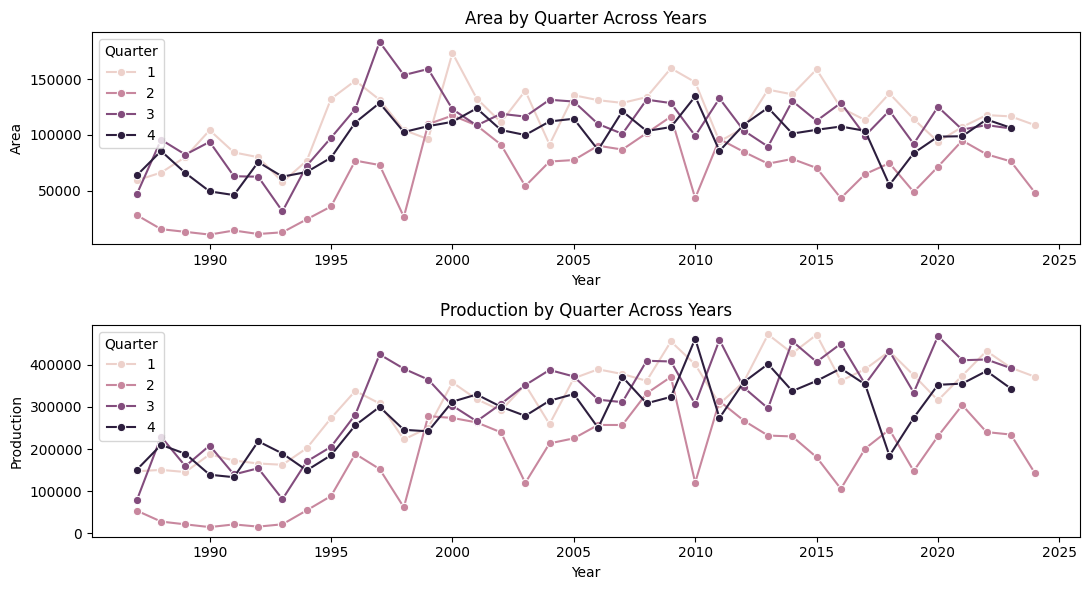

In [25]:
# aggregate data by Year and Quarter to see seasonal patterns
quarterly_data = dataset.groupby(['Year', 'Quarter'])[['Area', 'Production']].sum().reset_index()

# plot Area and Production for each quarter across the years
plt.figure(figsize=(11, 6))

# plot Area by Quarter
plt.subplot(2, 1, 1)
sns.lineplot(data=quarterly_data, x='Year', y='Area', hue='Quarter', marker='o')
plt.title('Area by Quarter Across Years')
plt.xlabel('Year')
plt.ylabel('Area')

# plot Production by Quarter
plt.subplot(2, 1, 2)
sns.lineplot(data=quarterly_data, x='Year', y='Production', hue='Quarter', marker='o')
plt.title('Production by Quarter Across Years')
plt.xlabel('Year')
plt.ylabel('Production')

plt.tight_layout()
plt.show()

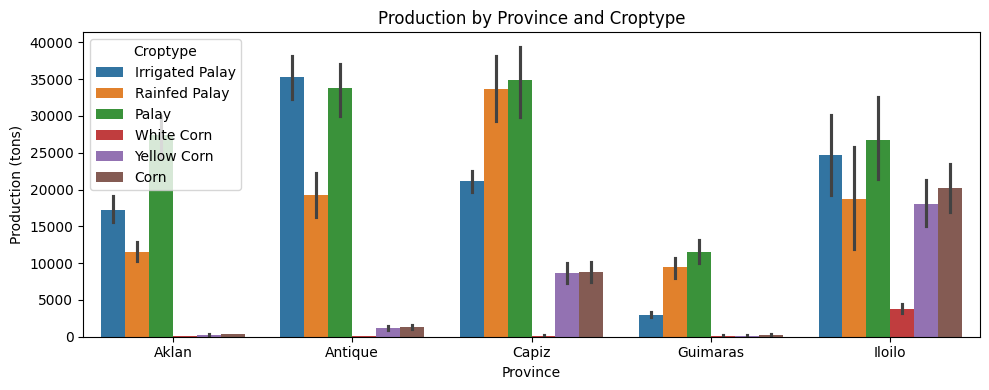

In [26]:
# visualizing production across Provinces with Croptype
plt.figure(figsize=(10, 4))

sns.barplot(x='Province', y='Production', hue='Croptype', data=dataset)

# adding titles and labels
plt.title('Production by Province and Croptype')
plt.xlabel('Province')
plt.ylabel('Production (tons)')

# Show the plot
plt.tight_layout()
plt.show()

                Area  Production   Quarter      Year
Area        1.000000    0.950185  0.015111 -0.024740
Production  0.950185    1.000000  0.037225  0.081674
Quarter     0.015111    0.037225  1.000000 -0.015977
Year       -0.024740    0.081674 -0.015977  1.000000


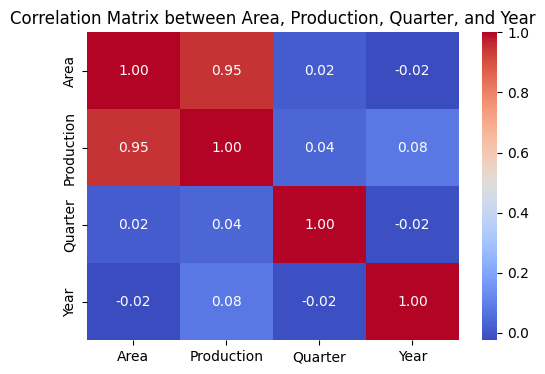

In [27]:
# calculate the correlation between Area and Production
corr = dataset[['Area', 'Production', 'Quarter', 'Year']].corr()
print(corr)

# visualize correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Area, Production, Quarter, and Year')
plt.show()

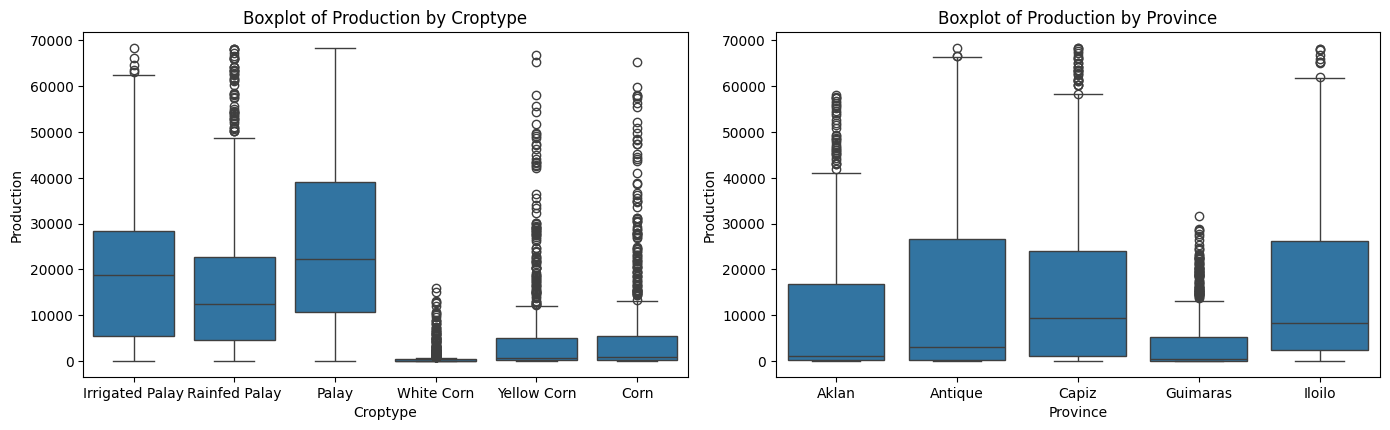

In [28]:
# boxplot for Area and Production
plt.figure(figsize=(14, 8))

# boxplot for Area
plt.subplot(2, 2, 1)
sns.boxplot(x='Croptype', y='Production', data=dataset)
plt.title('Boxplot of Production by Croptype')

# boxplot for Production
plt.subplot(2, 2, 2)
sns.boxplot(x='Province', y='Production', data=dataset)
plt.title('Boxplot of Production by Province')

plt.tight_layout()
plt.show()

In [29]:
aggregated_data = dataset.groupby(['Croptype', 'Province', 'Quarter', 'Year']).agg(
    total_production=('Production', 'sum'),
    total_area=('Area', 'sum'),
).reset_index()

<h4> Feature Engineering</h4>

In [30]:
dataset = dataset.sort_values(by='Date', ascending=True)

In [31]:
dataset.head(5)

,Date,Croptype,Province,Quarter,Year,Area,Production
42,1987-04-01,Palay,Capiz,2,1987,2180.0,3385.0
47,1987-04-01,White Corn,Capiz,2,1987,70.0,51.0
46,1987-04-01,White Corn,Antique,2,1987,260.0,43.0
45,1987-04-01,White Corn,Aklan,2,1987,110.0,80.0
52,1987-04-01,Yellow Corn,Capiz,2,1987,240.0,292.0


In [32]:
# one hot encoding for categorical variables Croptype and Province
encoding = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
encode_data = encoding.fit_transform(dataset[['Croptype', 'Province']])

dataset = pd.concat([dataset.reset_index(drop=True), encode_data.reset_index(drop=True)], axis=1)
dataset = dataset.drop(columns=['Croptype', 'Province'])

In [33]:
dataset['Log_Production'] = np.log(dataset['Production'] + 1)

In [34]:
dataset.head(5)

,Date,Quarter,Year,Area,Production,Croptype_Corn,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Aklan,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo,Log_Production
0,1987-04-01,2,1987,2180.0,3385.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.127405
1,1987-04-01,2,1987,70.0,51.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.951244
2,1987-04-01,2,1987,260.0,43.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.784190
3,1987-04-01,2,1987,110.0,80.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.394449
4,1987-04-01,2,1987,240.0,292.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.680173


<h4>Split train/test</h4>

In [35]:
# Initialize the scaler
scaler = StandardScaler()

# Split the dataset into training and testing sets based on the 'Date' column
train_data = dataset[dataset['Date'] < '2020-04-01']
test_data = dataset[dataset['Date'] >= '2020-04-01']

# Prepare the features and target variable
X_train = train_data.drop(['Production', 'Log_Production', 'Date'], axis=1)
y_train = train_data['Log_Production']
X_test = test_data.drop(['Production', 'Log_Production', 'Date'], axis=1)
y_test = test_data['Log_Production']

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

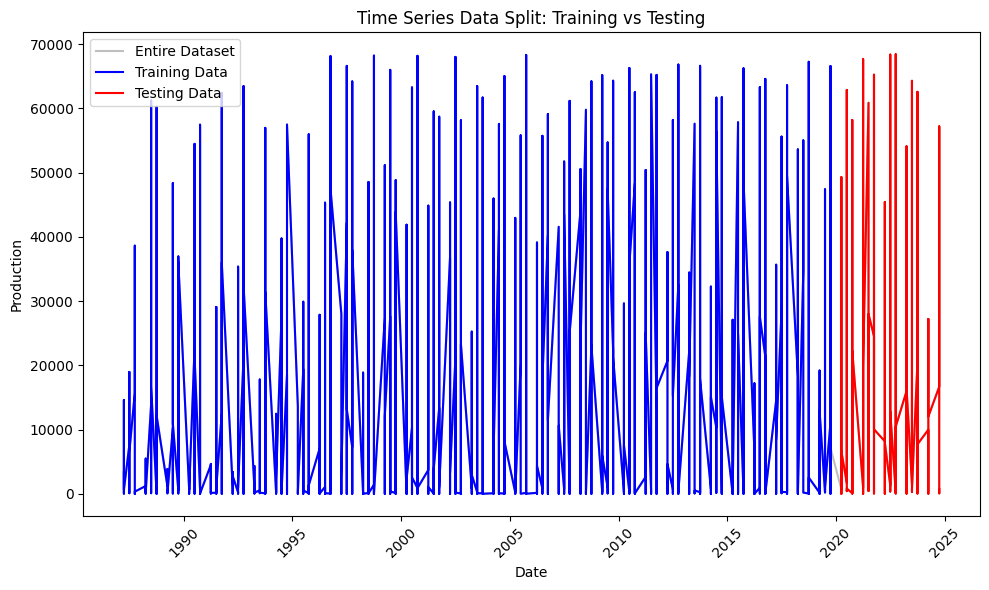

In [36]:
# Plot the entire production data, highlighting the training and testing periods
plt.figure(figsize=(10, 6))

# Plot the entire dataset
plt.plot(dataset['Date'], dataset['Production'], label='Entire Dataset', color='gray', alpha=0.5)

# Plot the training data (before 2017-04-01)
plt.plot(train_data['Date'], train_data['Production'], label='Training Data', color='blue')

# Plot the testing data (from 2017-04-01 onwards)
plt.plot(test_data['Date'], test_data['Production'], label='Testing Data', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Time Series Data Split: Training vs Testing')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

<hr>
<h2> Implementing Machine Learning Algorithms</h2>
<hr>

<h4>Extreme Gradient Boosting (XGboost)</h4>

In [37]:
# perform gradientsearch

param_grid = {
     'learning_rate': [0.01, 0.1, 0.2],
     'max_depth': [3, 4, 5],
     'n_estimators': [100, 200, 500],
     'subsample': [0.8, 1.0],
     'reg_alpha': [0.01, 0.1, 0.2],
     'reg_lambda': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# best parameters found by GridSearchCV
print(grid_search.best_params_)

# use the best model
model_xgb = grid_search.best_estimator_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'reg_alpha': 0.01, 'reg_lambda': 0.1, 'subsample': 0.8}


In [38]:
# make predictions
y_pred_xgb = model_xgb.predict(X_test_scaled)

In [39]:
y_pred_original_xgb = np.exp(y_pred_xgb) - 1
y_test_original = np.exp(y_test) - 1

In [40]:
results = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original_xgb})
results.head(5)

,Actual,Predicted
3040,681.00,554.320435
3041,49297.01,45867.671875
3042,14320.00,14209.629883
3043,10238.00,10069.227539
3044,6497.39,5183.495117


In [41]:
# calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original, y_pred_original_xgb)
mse_train = mean_squared_error(y_test_original, y_pred_original_xgb)
rmse = np.sqrt(mse_train)
smape = (1/len(y_test_original)) * np.sum(np.abs(y_test_original - y_pred_original_xgb) /
 (np.abs(y_test_original) + np.abs(y_pred_original_xgb) + 1e-9))

mape = np.mean(np.abs((y_test_original - y_pred_original_xgb) / y_test_original) * 100)

# create a DataFrame to store the results
performance_xgb = pd.DataFrame({
    'Model': ['MAE', 'MAPE', 'RMSE', 'SMAPE'],
    'XG Boost': [mae_train, mape, rmse, smape]
})

# transpose to make the performance horizontal
performance_xgb = performance_xgb.set_index('Model').T

# display the DataFrame
performance_xgb

Model,MAE,MAPE,RMSE,SMAPE
XG Boost,1217.25338,14.195011,2225.081848,0.071625


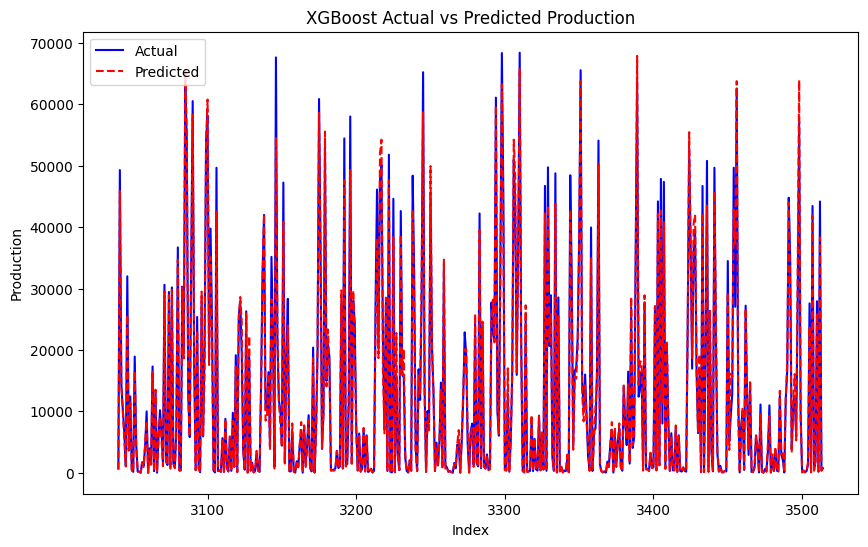

In [96]:
# 6. plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original.index, y_test_original, label='Actual', color='blue')
plt.plot(y_test_original.index, y_pred_original_xgb, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('XGBoost Actual vs Predicted Production')
plt.show()

<h4>Random Forest Regression</h4>

In [43]:
param_grid = {
     'n_estimators': [50, 100, 200],
     'max_depth': [3, 5, 10, None],
     'min_samples_split': [2, 5],
     'min_samples_leaf': [1, 2, 4],
     'max_features': ['sqrt', 'log2'],
     'bootstrap': [True]
}

# perform Grid Search with RandomForestRegressor
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# best parameters found by GridSearchCV
print(grid_search_rf.best_params_)

# use the best model
model_rf = grid_search_rf.best_estimator_

{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [44]:
# make predictions
y_pred_rf = model_rf.predict(X_test_scaled)

In [45]:
y_pred_original_rf = np.exp(y_pred_rf) - 1
y_test_original = np.exp(y_test) - 1

In [46]:
results = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original_rf})
results.head(5)

,Actual,Predicted
3040,681.00,497.046746
3041,49297.01,41680.578843
3042,14320.00,14155.558124
3043,10238.00,10864.851580
3044,6497.39,6187.778654


In [98]:
# calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original, y_pred_original_rf)
mse_train = mean_squared_error(y_test_original, y_pred_original_rf)
rmse = np.sqrt(mse_train)
mape = np.mean(np.abs((y_test_original - y_pred_original_rf) / y_pred_original_rf) * 100)
smape = (1/len(y_test_original)) * np.sum(np.abs(y_test_original - y_pred_original_rf) /
 (np.abs(y_test_original) + np.abs(y_pred_original_rf) + 1e-9))


# create a DataFrame to store the results
performance_rf = pd.DataFrame({
    'Model': ['MAE', 'MAPE', 'RMSE', 'SMAPE'],
    'Random Forest': [mae_train, mape, rmse, smape]
})

# transpose to make the performance horizontal
performance_rf = performance_rf.set_index('Model').T

# display the DataFrame
performance_rf

Model,MAE,MAPE,RMSE,SMAPE
Random Forest,2021.622157,26.173708,4096.848756,0.107906


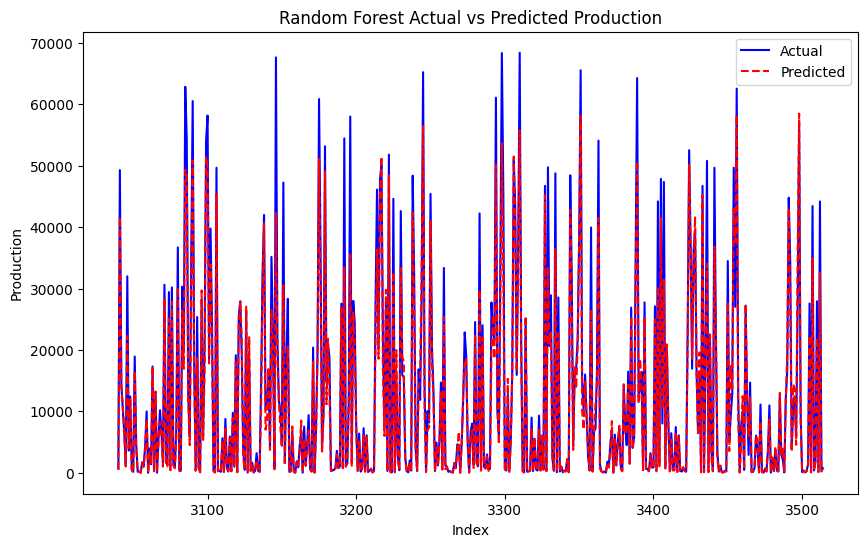

In [99]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original.index, y_test_original, label='Actual', color='blue')
plt.plot(y_test_original.index, y_pred_original_rf, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Random Forest Actual vs Predicted Production')
plt.show()

<h4>Linear Regression</h4>

In [49]:
# perform linear regression

param_grid = {
      'fit_intercept': [True, False],
      'copy_X': [True, False]
}

grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# best parameters found by GridSearchCV
print(grid_search.best_params_)

# use the best model
model_lr = grid_search.best_estimator_

{'copy_X': True, 'fit_intercept': True}


In [50]:
# make predictions
y_pred_lr= model_lr.predict(X_test_scaled)

In [51]:
y_pred_original_lr = np.exp(y_pred_lr) - 1
y_test_original = np.exp(y_test) - 1

In [52]:
results = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original_lr})
results.head(5)

,Actual,Predicted
3040,681.00,2236.703024
3041,49297.01,216261.906248
3042,14320.00,13015.165588
3043,10238.00,7690.140214
3044,6497.39,26427.528319


In [53]:
# calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original, y_pred_original_lr)
mse_train = mean_squared_error(y_test_original, y_pred_original_lr)
rmse = np.sqrt(mse_train)
mape = np.mean(np.abs((y_test_original - y_pred_original_lr) / y_test_original) * 100)
smape = (1/len(y_test_original)) * np.sum(np.abs(y_test_original - y_pred_original_lr) /
 (np.abs(y_test_original) + np.abs(y_pred_original_lr) + 1e-9))

# create a DataFrame to store the results
performance_lr = pd.DataFrame({
    'Model': ['MAE', 'MAPE', 'RMSE', 'SMAPE'],
    'Linear Regression': [mae_train, mape, rmse, smape]
})

# transpose to make the performance horizontal
performance_lr = performance_lr.set_index('Model').T

# display the DataFrame
performance_lr

Model,MAE,MAPE,RMSE,SMAPE
Linear Regression,16062.700263,133.043564,54028.439415,0.367739


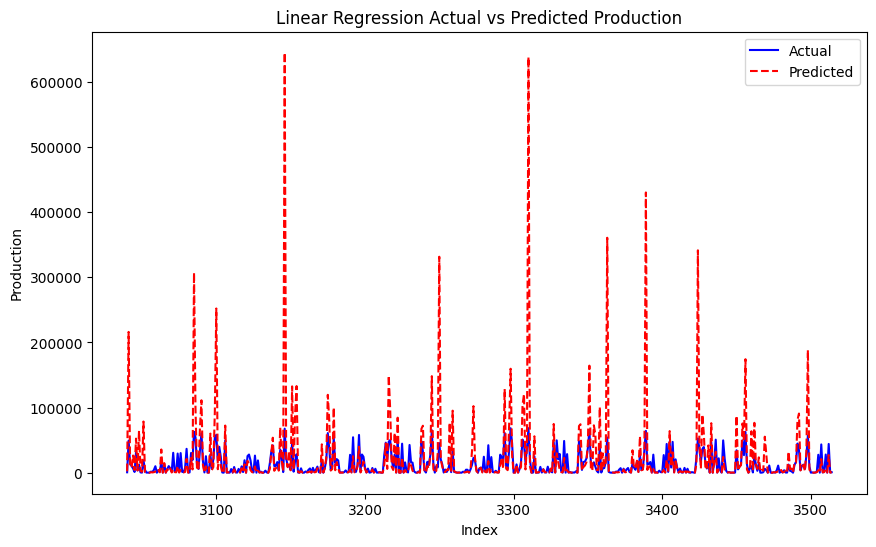

In [100]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original.index, y_test_original, label='Actual', color='blue')
plt.plot(y_test_original.index, y_pred_original_lr, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Linear Regression Actual vs Predicted Production')
plt.show()

<h4>K-Nearest Neighbor</h4>

In [55]:
# perform k-nearest neighbor

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

# best parameters found by GridSearchCV
print("Best Parameters:", grid_search_knn.best_params_)

# use the best model
model_knn = grid_search_knn.best_estimator_

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [56]:
# make predictions
y_pred_knn = model_knn.predict(X_test_scaled)

In [57]:
y_pred_original_knn = np.exp(y_pred_knn) - 1
y_test_original = np.exp(y_test) - 1

In [58]:
results = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original_knn})
results.head(5)

,Actual,Predicted
3040,681.00,223.206946
3041,49297.01,41950.881046
3042,14320.00,14698.706065
3043,10238.00,8783.203051
3044,6497.39,6492.101152


In [59]:
# calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original, y_pred_original_knn)
mse_train = mean_squared_error(y_test_original, y_pred_original_knn)
rmse = np.sqrt(mse_train)
mape = np.mean(np.abs((y_test_original - y_pred_original_knn) / y_test_original) * 100)
smape = (1/len(y_test_original)) * np.sum(np.abs(y_test_original - y_pred_original_knn) /
 (np.abs(y_test_original) + np.abs(y_pred_original_knn) + 1e-9))


# create a DataFrame to store the results
performance_knn = pd.DataFrame({
    'Model': ['MAE', 'MAPE', 'RMSE', 'SMAPE'],
    'K-Nearest Neighbor': [mae_train, mape, rmse, smape]
})

# transpose to make the performance horizontal
performance_knn = performance_knn.set_index('Model').T

# display the DataFrame
performance_knn

Model,MAE,MAPE,RMSE,SMAPE
K-Nearest Neighbor,2276.290483,33.826273,4271.281769,0.168065


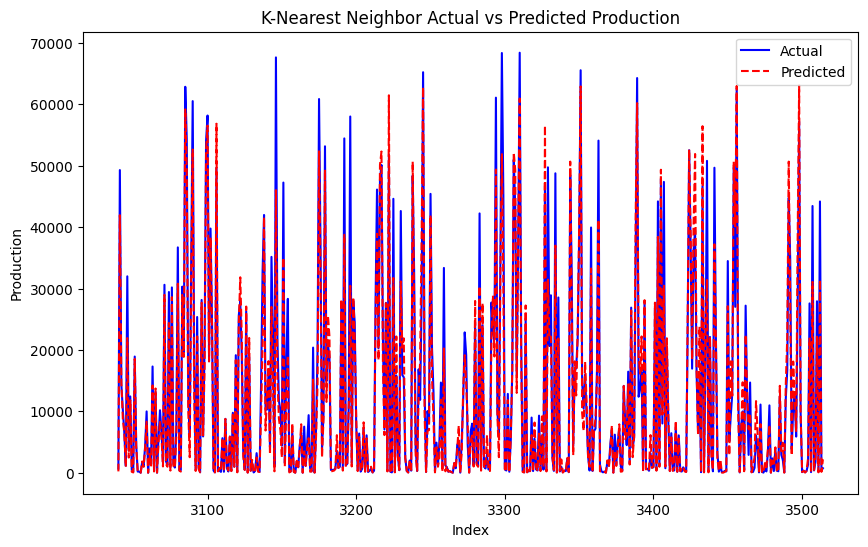

In [102]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original.index, y_test_original, label='Actual', color='blue')
plt.plot(y_test_original.index, y_pred_original_knn, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('K-Nearest Neighbor Actual vs Predicted Production')
plt.show()

<h4>Support Vector Regression</h4>

In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# hyperparameters
param_grid = {
    'C': [1, 10, 50, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# fit training data
grid_search.fit(X_train_scaled, y_train)
# Best parameters found by GridSearchCV

print(grid_search_rf.best_params_)
# use best model
model_svr = grid_search.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [62]:
y_pred_svr = model_svr.predict(X_test_scaled)

In [63]:
y_pred_original_svr = np.exp(y_pred_svr) - 1
y_test_original = np.exp(y_test) - 1

In [64]:
results = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original_svr})
results.head(5)

,Actual,Predicted
3040,681.00,1486.545856
3041,49297.01,44118.533113
3042,14320.00,13864.979503
3043,10238.00,9942.162038
3044,6497.39,5531.334076


In [65]:
# calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original, y_pred_original_svr)
mse_train = mean_squared_error(y_test_original, y_pred_original_svr)
rmse = np.sqrt(mse_train)
mape = np.mean(np.abs((y_test_original - y_pred_original_svr) / y_test_original) * 100)
smape = (1/len(y_test_original)) * np.sum(np.abs(y_test_original - y_pred_original_svr) /
 (np.abs(y_test_original) + np.abs(y_pred_original_svr) + 1e-9))

# create a DataFrame to store the results
performance_svr = pd.DataFrame({
    'Model': ['MAE', 'MAPE', 'RMSE', 'SMAPE'],
    'Support Vector Regression': [mae_train, mape, rmse, smape]
})

# transpose to make the performance horizontal
performance_svr = performance_svr.set_index('Model').T

# display the DataFrame
performance_svr

Model,MAE,MAPE,RMSE,SMAPE
Support Vector Regression,2171.360387,62.052071,3666.856666,0.192748


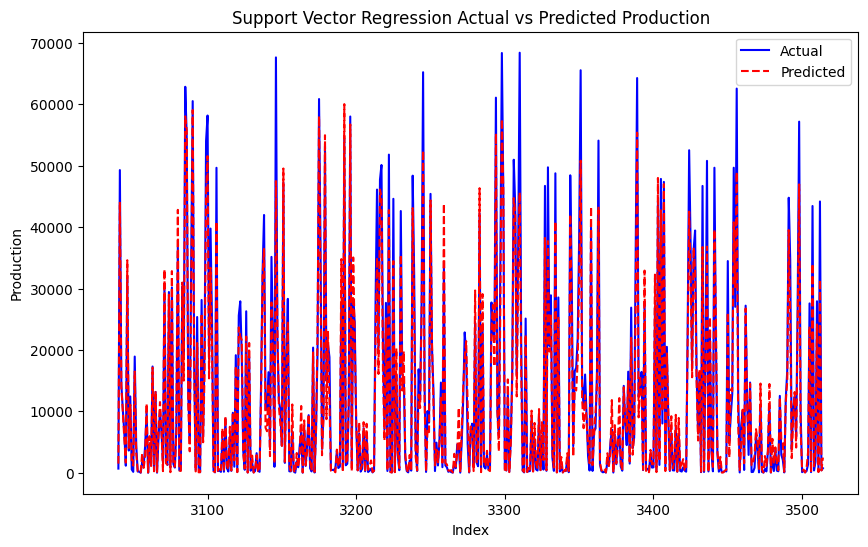

In [103]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original.index, y_test_original, label='Actual', color='blue')
plt.plot(y_test_original.index, y_pred_original_svr, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Support Vector Regression Actual vs Predicted Production')
plt.show()

<h4>Aritifical Neural Network</h4>

In [67]:
# tensorflow installation for neural networks
try:
  import tensorflow as tf
  if tf.__version__ < '2.12.0':
    !pip install tensorflow==2.12.0 --quiet
except:
  !pip install tensorflow==2.12.0 --quiet

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [68]:
# build the ANN model
model_ann = Sequential()

# input layer with 64 neurons, ReLU activation, and input shape matching your features
model_ann.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# add a second hidden layer with 32 neurons and ReLU activation
model_ann.add(Dense(units=32, activation='relu'))

# output layer with 1 neuron (for regression)
model_ann.add(Dense(units=1))

# compile the model
model_ann.compile(optimizer=Adam(), loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
# train the model
history = model_ann.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 38.2276 - val_loss: 1.9654
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7967 - val_loss: 1.3826
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3786 - val_loss: 1.0733
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1279 - val_loss: 0.9726
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0203 - val_loss: 0.8405
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9680 - val_loss: 0.9166
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9910 - val_loss: 0.8057
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8931 - val_loss: 0.7778
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8214 - val_loss: 0.8342
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7747 - val_loss: 0.7161
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7455 - val_loss: 0.7213
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6887 - val_l

In [70]:
# make predictions on the test set
y_pred_ann = model_ann.predict(X_test_scaled).flatten()  # Flatten to 1D

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [71]:
# reshape predictions and test data back to original scale
y_pred_original_ann = np.exp(y_pred_ann) - 1
y_test_original = np.exp(y_test) - 1

In [72]:
results = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original_ann})
results.head()

,Actual,Predicted
3040,681.00,355.681580
3041,49297.01,38141.402344
3042,14320.00,11370.899414
3043,10238.00,12433.028320
3044,6497.39,8835.702148


In [73]:
# calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original, y_pred_original_ann)
mse_train = mean_squared_error(y_test_original, y_pred_original_ann)
rmse = np.sqrt(mse_train)
mape = np.mean(np.abs((y_test_original - y_pred_original_ann) / y_test_original) * 100)
smape = (1/len(y_test_original)) * np.sum(np.abs(y_test_original - y_pred_original_svr) /
 (np.abs(y_test_original) + np.abs(y_pred_original_svr) + 1e-9))

# create a DataFrame to store the results
performance_ann = pd.DataFrame({
    'Model': ['MAE', 'MAPE', 'RMSE','SMAPE'],
    'ANN': [mae_train, mape, rmse, smape]
})

# transpose to make the performance horizontal
performance_ann = performance_ann.set_index('Model').T

# display the DataFrame
performance_ann

Model,MAE,MAPE,RMSE,SMAPE
ANN,6588.845447,77.638271,14421.802959,0.192748


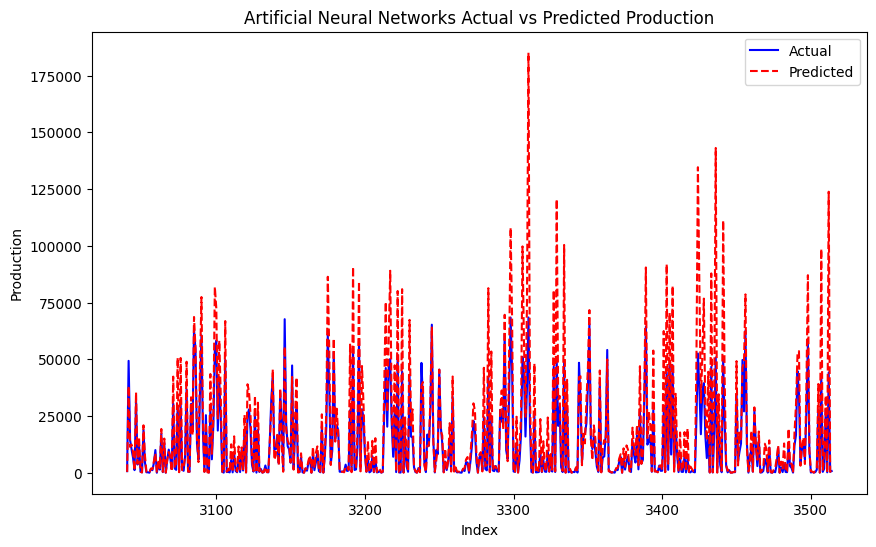

In [104]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original.index, y_test_original, label='Actual', color='blue')
plt.plot(y_test_original.index, y_pred_original_ann, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Artificial Neural Networks Actual vs Predicted Production')
plt.show()

<h4>Comparison of Model Performance</h4>

In [75]:
merged_performance = pd.concat([performance_xgb, performance_rf, performance_lr, performance_svr, performance_knn, performance_ann], axis=0)

In [76]:
merged_performance

Model,MAE,MAPE,RMSE,SMAPE
XG Boost,1217.253380,14.195011,2225.081848,0.071625
Random Forest,2021.622157,26.173708,4096.848756,0.107906
Linear Regression,16062.700263,133.043564,54028.439415,0.367739
Support Vector Regression,2171.360387,62.052071,3666.856666,0.192748
K-Nearest Neighbor,2276.290483,33.826273,4271.281769,0.168065
ANN,6588.845447,77.638271,14421.802959,0.192748


# Plotting the predicted values of the different models

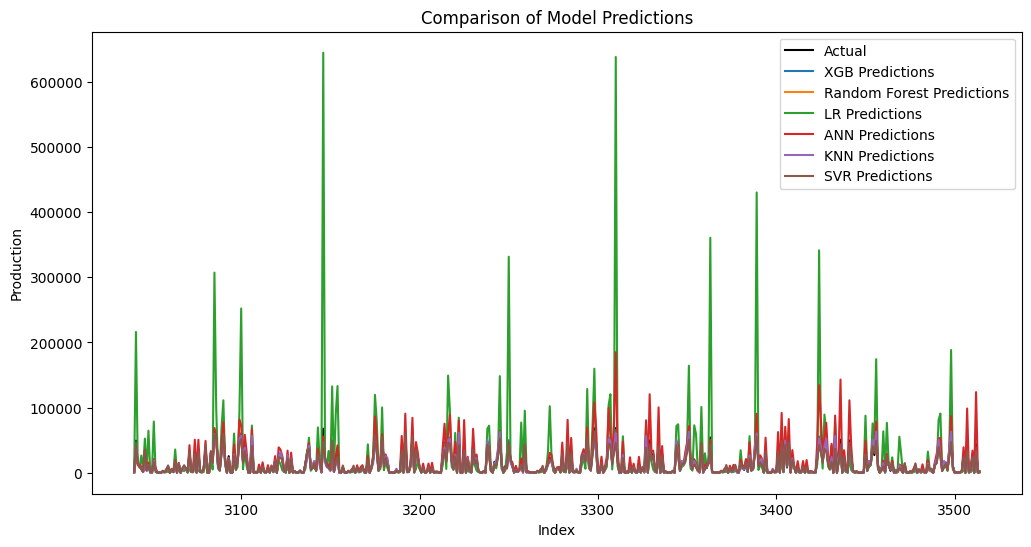

In [77]:
# plotted all

plt.figure(figsize=(12, 6))
plt.plot(y_test_original.index, y_test_original, label='Actual', color='black')
plt.plot(y_test_original.index, y_pred_original_xgb, label='XGB Predictions')
plt.plot(y_test_original.index, y_pred_original_rf, label='Random Forest Predictions')
plt.plot(y_test_original.index, y_pred_original_lr, label='LR Predictions')
plt.plot(y_test_original.index, y_pred_original_ann, label='ANN Predictions')
plt.plot(y_test_original.index, y_pred_original_knn, label='KNN Predictions')
plt.plot(y_test_original.index, y_pred_original_svr, label='SVR Predictions')

plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Comparison of Model Predictions')
plt.show()

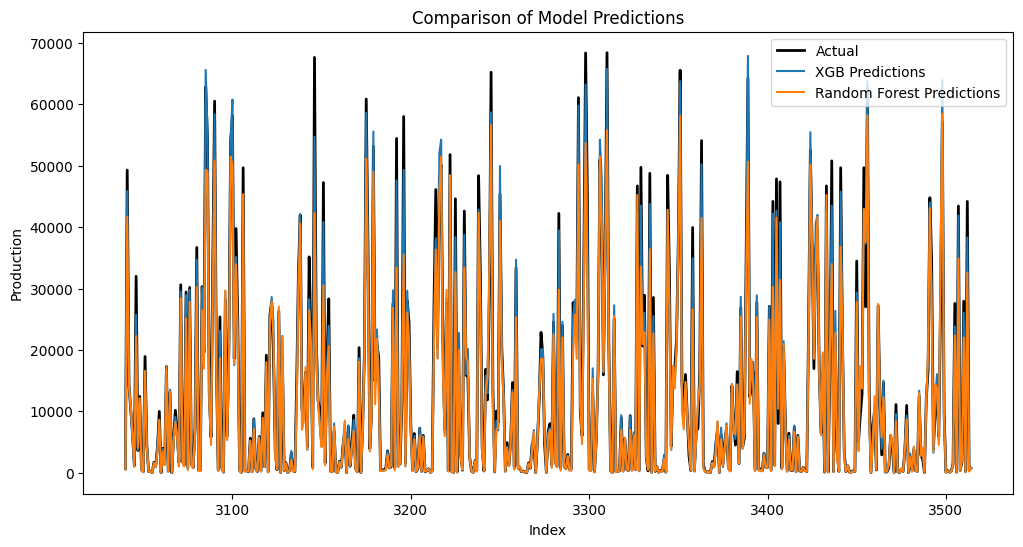

In [78]:
# XGB and RF vs Actual

plt.figure(figsize=(12, 6))
plt.plot(y_test_original.index, y_test_original, label='Actual', color='black', linewidth=2)
plt.plot(y_test_original.index, y_pred_original_xgb, label='XGB Predictions')
plt.plot(y_test_original.index, y_pred_original_rf, label='Random Forest Predictions')


plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Comparison of Model Predictions')
plt.show()

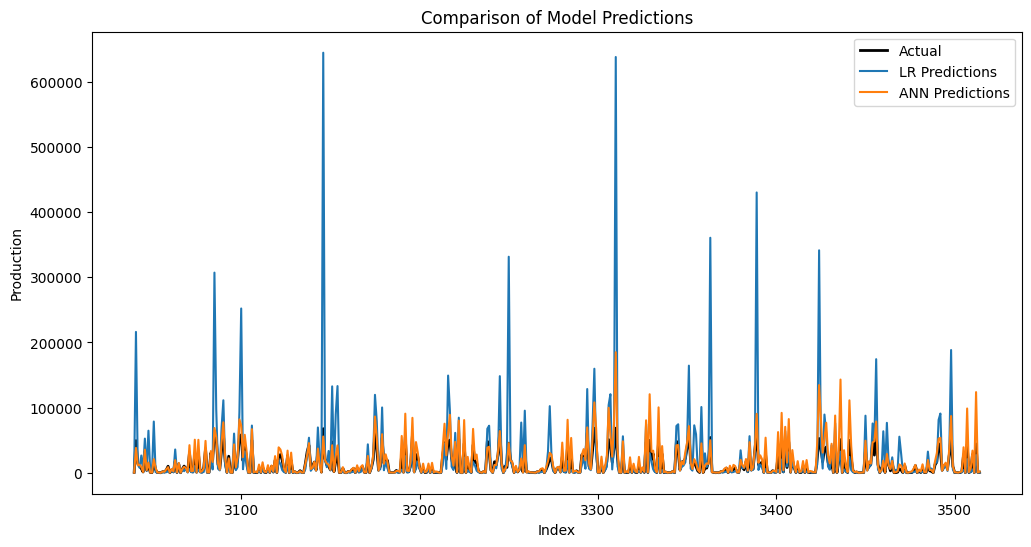

In [79]:
# LR and ANN vs Actual

plt.figure(figsize=(12, 6))
plt.plot(y_test_original.index, y_test_original, label='Actual', color='black', linewidth = 2)
plt.plot(y_test_original.index, y_pred_original_lr, label='LR Predictions')
plt.plot(y_test_original.index, y_pred_original_ann, label='ANN Predictions')


plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Comparison of Model Predictions')
plt.show()

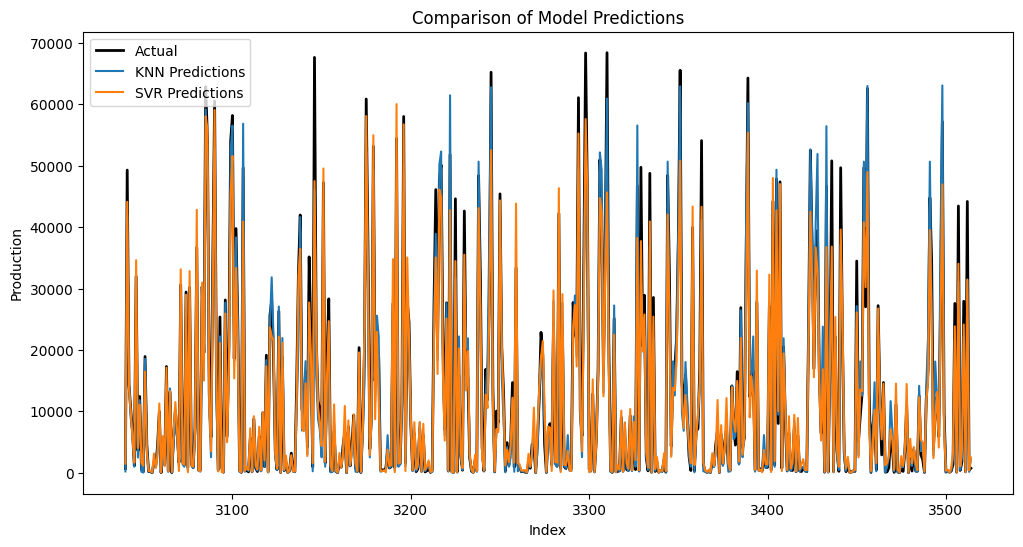

In [80]:
# KNN and SVR vs Actual

plt.figure(figsize=(12, 6))
plt.plot(y_test_original.index, y_test_original, label='Actual', color='black',linewidth = 2)
plt.plot(y_test_original.index, y_pred_original_knn, label='KNN Predictions')
plt.plot(y_test_original.index, y_pred_original_svr, label='SVR Predictions')


plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Comparison of Model Predictions')
plt.show()

#### Model Comparion based on the predictive errors

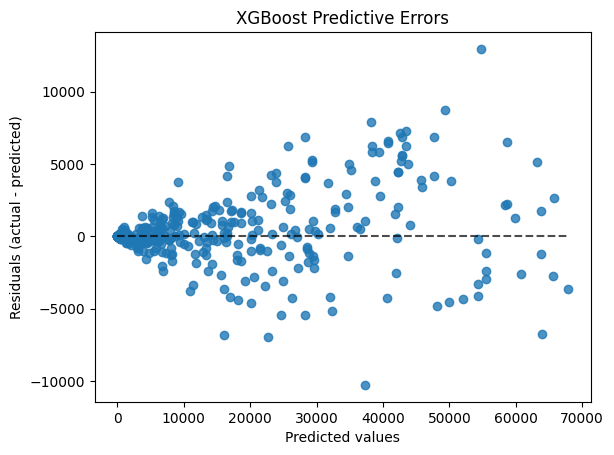

In [85]:
from sklearn.metrics import PredictionErrorDisplay

# predictive error xgboost
predictive_errors = PredictionErrorDisplay.from_predictions(y_test_original, y_pred_original_xgb)

predictive_errors
plt.title('XGBoost Predictive Errors')
plt.show()

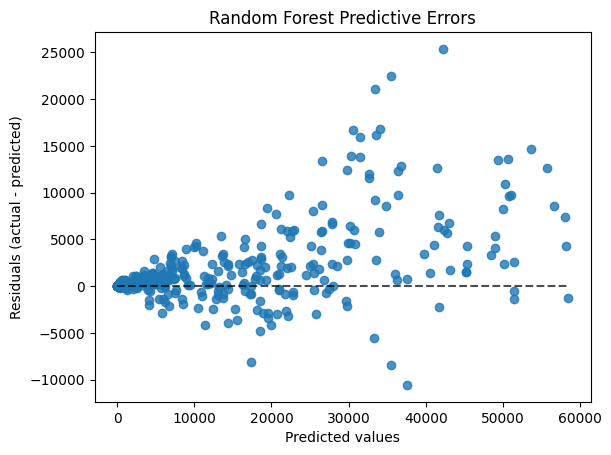

In [88]:
# predicitve error of Random Forest

predictive_errors = PredictionErrorDisplay.from_predictions(y_test_original, y_pred_original_rf)

predictive_errors
plt.title('Random Forest Predictive Errors')
plt.show()

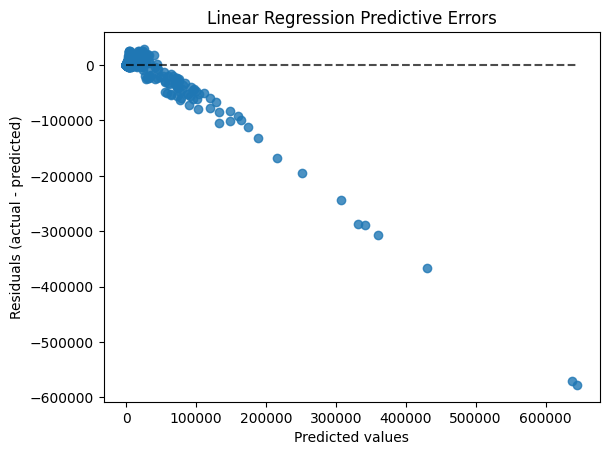

In [91]:
# predicitve error of Linear Regression

predictive_errors = PredictionErrorDisplay.from_predictions(y_test_original, y_pred_original_lr)

predictive_errors
plt.title('Linear Regression Predictive Errors')
plt.show()

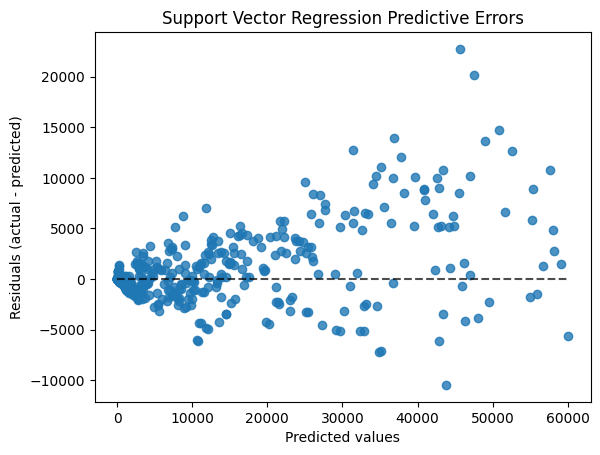

In [93]:
# predicitve error of Support Vector Regression

predictive_errors = PredictionErrorDisplay.from_predictions(y_test_original, y_pred_original_svr)

predictive_errors
plt.title('Support Vector Regression Predictive Errors')
plt.show()

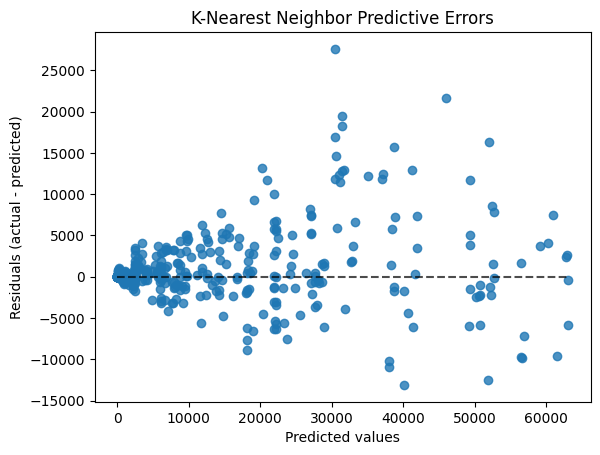

In [94]:
# predicitve error of K-Nearest Neighbor

predictive_errors = PredictionErrorDisplay.from_predictions(y_test_original, y_pred_original_knn)

predictive_errors
plt.title('K-Nearest Neighbor Predictive Errors')
plt.show()

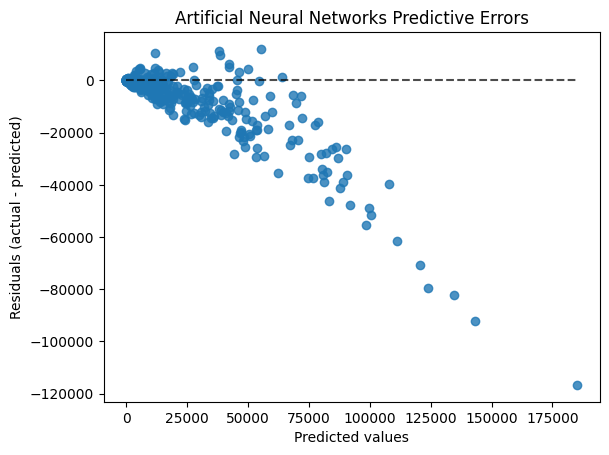

In [95]:
# predicitve error of Artificial Neural Networks

predictive_errors = PredictionErrorDisplay.from_predictions(y_test_original, y_pred_original_ann)

predictive_errors
plt.title('Artificial Neural Networks Predictive Errors')
plt.show()